In [1]:
from qiskit import *
from qiskit.tools.visualization import array_to_latex , plot_histogram, plot_bloch_multivector
from math import pi
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
%matplotlib inline

IBMQ.save_account('bc198117720621ce2cefda12b1cf37946028d7cc2c6268b849ccebfc45a5495107087dc658b5b5b126029c6376b395d2ab21610dd03478183c4b0ce60f0d182f')


/tmp/ipykernel_19620/1957236182.py:8: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('bc198117720621ce2cefda12b1cf37946028d7cc2c6268b849ccebfc45a5495107087dc658b5b5b126029c6376b395d2ab21610dd03478183c4b0ce60f0d182f')
/tmp/ipykernel_19620/1957236182.py:8: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('bc198117720621ce2cefda12b1cf379460

## failed implementation of surface code

In [16]:
# Creating class and methods for both quantum simulators and real Quantum computers

class Simulators():

    def StateVectorSimulator(circuit):
        simulator = Aer.get_backend('statevector_simulator')
        statevector = execute(circuit, backend=simulator).result().get_statevector()
        return statevector

    def QasmSimulator(circuit, shots):
        simulator = Aer.get_backend('qasm_simulator')
        counts = execute(circuit, backend=simulator, shots=shots).result().get_counts()
        return counts

    def UnitarySimulator(circuit):
        simulator = Aer.get_backend('unitary_simulator')
        unitary = execute(circuit, backend=simulator).result().get_unitary()
        return unitary
    
class QuantumComputer():
    def __init__(self, name, circuit, shots):
        self.Quantum = name
        self.circuit = circuit
        self.shots = shots
        
    def RealQuantumComputer(self):
        provider = IBMQ.load_account()
        q_computer = provider.get_backend(self.Quantum)
        transpiled_circuit(self.circuit,backend)
        job = execute(transpiled_circuit, backend = q_computer, shots = self.shots)
        print(job.job_id())
        job_monitor(job)
        return job_monitor , job
    

In [3]:
data_qubits = QuantumRegister(9, name='data')
measurement_qubits = QuantumRegister(8, name='measurement')
classical_bits = ClassicalRegister(4,name='classical_outputs')

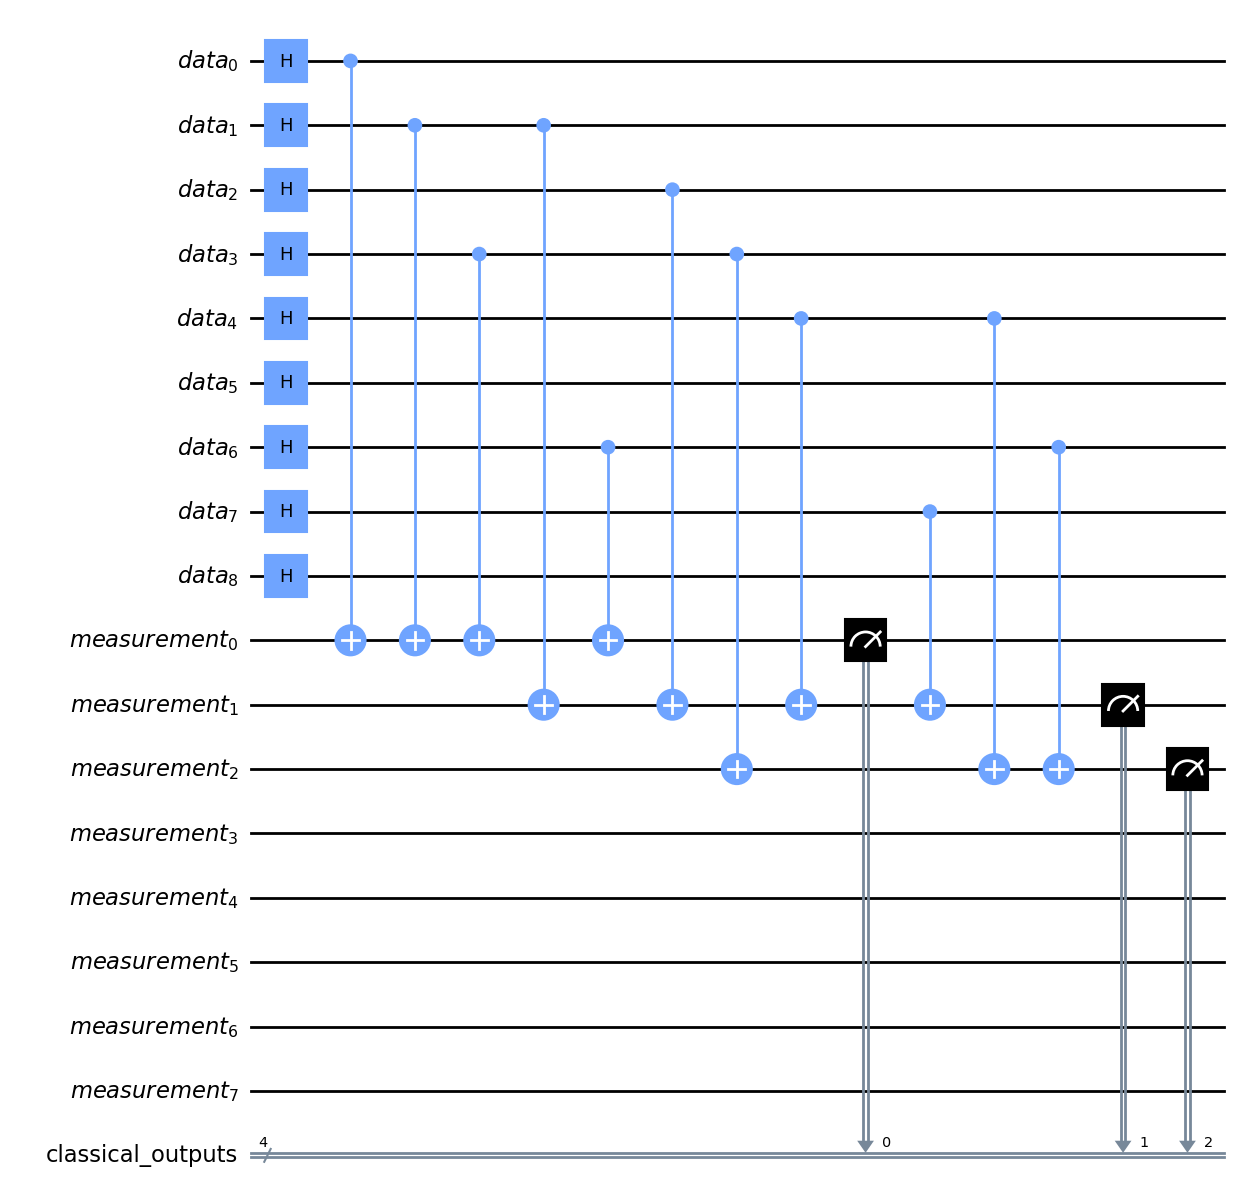

In [4]:
surface_code_circuit = QuantumCircuit(data_qubits,measurement_qubits,classical_bits)

for i in range(len(data_qubits)):
    surface_code_circuit.h(data_qubits[i])
    
surface_code_circuit.cx(data_qubits[0], measurement_qubits[0])
surface_code_circuit.cx(data_qubits[1], measurement_qubits[0])
surface_code_circuit.cx(data_qubits[3], measurement_qubits[0])
surface_code_circuit.cx(data_qubits[6], measurement_qubits[0])

surface_code_circuit.cx(data_qubits[1], measurement_qubits[1])
surface_code_circuit.cx(data_qubits[2], measurement_qubits[1])
surface_code_circuit.cx(data_qubits[4], measurement_qubits[1])
surface_code_circuit.cx(data_qubits[7], measurement_qubits[1])

surface_code_circuit.cx(data_qubits[3], measurement_qubits[2])
surface_code_circuit.cx(data_qubits[4], measurement_qubits[2])
surface_code_circuit.cx(data_qubits[6], measurement_qubits[2])

surface_code_circuit.measure(measurement_qubits[0], classical_bits[0])
surface_code_circuit.measure(measurement_qubits[1], classical_bits[1])
surface_code_circuit.measure(measurement_qubits[2], classical_bits[2])


surface_code_circuit.draw(output='mpl')

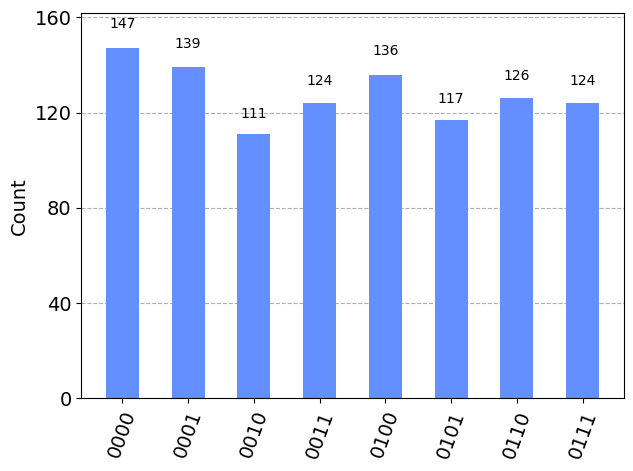

In [5]:
plot_histogram(Simulators.QasmSimulator(surface_code_circuit, 1024))

## Surface COde

In [6]:
surface_code = QuantumCircuit(9,9)
surface_code.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
     
q_8: 
     
c: 9/

In [7]:
for i in range(9):
    surface_code.initialize([1,0], i)
    
for i in range(9):
    surface_code.h(i)
    



In [8]:
surface_code.draw()

┌─────────────────┐┌───┐
q_0: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_1: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_2: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_3: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_4: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_5: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_6: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_7: ┤ Initialize(1,0) ├┤ H ├
     ├─────────────────┤├───┤
q_8: ┤ Initialize(1,0) ├┤ H ├
     └─────────────────┘└───┘
c: 9/════════════════════════

In [11]:
cnot_gate = QuantumCircuit(2)
cnot_gate.cx(0,1)
cnot_gate.draw()

surface_code.compose(cnot_gate,[0,1], inplace=True)
surface_code.compose(cnot_gate,[3,4], inplace=True)

In [12]:
cnot_gate.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [13]:
surface_code.draw()

┌─────────────────┐┌───┐     
q_0: ┤ Initialize(1,0) ├┤ H ├──■──
     ├─────────────────┤├───┤┌─┴─┐
q_1: ┤ Initialize(1,0) ├┤ H ├┤ X ├
     ├─────────────────┤├───┤└───┘
q_2: ┤ Initialize(1,0) ├┤ H ├─────
     ├─────────────────┤├───┤     
q_3: ┤ Initialize(1,0) ├┤ H ├──■──
     ├─────────────────┤├───┤┌─┴─┐
q_4: ┤ Initialize(1,0) ├┤ H ├┤ X ├
     ├─────────────────┤├───┤└───┘
q_5: ┤ Initialize(1,0) ├┤ H ├─────
     ├─────────────────┤├───┤     
q_6: ┤ Initialize(1,0) ├┤ H ├─────
     ├─────────────────┤├───┤     
q_7: ┤ Initialize(1,0) ├┤ H ├─────
     ├─────────────────┤├───┤     
q_8: ┤ Initialize(1,0) ├┤ H ├─────
     └─────────────────┘└───┘     
c: 9/═════════════════════════════

In [14]:
for i in range(9):
    surface_code.measure(i,i)

In [15]:
surface_code.draw()

┌─────────────────┐┌───┐                 ┌─┐         
q_0: ┤ Initialize(1,0) ├┤ H ├──■──────────────┤M├─────────
     ├─────────────────┤├───┤┌─┴─┐            └╥┘┌─┐      
q_1: ┤ Initialize(1,0) ├┤ H ├┤ X ├─────────────╫─┤M├──────
     ├─────────────────┤├───┤└───┘┌─┐          ║ └╥┘      
q_2: ┤ Initialize(1,0) ├┤ H ├─────┤M├──────────╫──╫───────
     ├─────────────────┤├───┤     └╥┘          ║  ║ ┌─┐   
q_3: ┤ Initialize(1,0) ├┤ H ├──■───╫───────────╫──╫─┤M├───
     ├─────────────────┤├───┤┌─┴─┐ ║           ║  ║ └╥┘┌─┐
q_4: ┤ Initialize(1,0) ├┤ H ├┤ X ├─╫───────────╫──╫──╫─┤M├
     ├─────────────────┤├───┤└┬─┬┘ ║           ║  ║  ║ └╥┘
q_5: ┤ Initialize(1,0) ├┤ H ├─┤M├──╫───────────╫──╫──╫──╫─
     ├─────────────────┤├───┤ └╥┘  ║ ┌─┐       ║  ║  ║  ║ 
q_6: ┤ Initialize(1,0) ├┤ H ├──╫───╫─┤M├───────╫──╫──╫──╫─
     ├─────────────────┤├───┤  ║   ║ └╥┘┌─┐    ║  ║  ║  ║ 
q_7: ┤ Initialize(1,0) ├┤ H ├──╫───╫──╫─┤M├────╫──╫──╫──╫─
     ├─────────────────┤├───┤  ║   ║  ║ └╥┘┌─┐ ║  ║  ║  ║ 
q_8: ┤ Initialize(1,0) ├┤ H ├──╫───╫──╫──╫─┤M├─╫──╫──╫──╫─
     └─────────────────┘└───┘  ║   ║  ║  ║ └╥┘ ║  ║  ║  ║ 
c: 9/══════════════════════════╩═══╩══╩══╩══╩══╩══╩══╩══╩═
                               5   2  6  7  8  0  1  3  4

In [17]:
counts = Simulators.QasmSimulator(surface_code,1024)

In [18]:
print('Measurements: ', counts)

Measurements:  {'011110011': 1, '000101010': 1, '111111011': 1, '000110010': 1, '011110100': 1, '110000111': 1, '100011101': 1, '101111111': 2, '111101000': 2, '011111010': 2, '010010101': 1, '000110001': 2, '111100111': 1, '111111001': 1, '100011111': 1, '000011011': 1, '011011011': 2, '001001001': 2, '010001110': 1, '110000001': 1, '100110010': 1, '011011010': 2, '111010101': 1, '010110001': 1, '111110110': 1, '000110101': 1, '101111010': 1, '111101001': 1, '111101101': 1, '100000011': 1, '000010101': 1, '010100011': 2, '000110111': 2, '000000100': 1, '001101111': 1, '011101001': 2, '111101010': 1, '101111011': 1, '001110101': 1, '100011001': 2, '110110100': 2, '001101011': 2, '110000100': 2, '010011100': 2, '010001001': 2, '101110100': 2, '111000011': 1, '010011001': 2, '011110010': 3, '100001111': 3, '110100100': 1, '010111101': 4, '000010001': 1, '110000011': 3, '001101010': 3, '010110111': 1, '001001000': 1, '001011001': 2, '101001110': 2, '001010011': 2, '010011101': 3, '1101010

In [22]:
import networkx as nx

In [42]:
syndromes = ['001010100', '110001000', '110101000' ]

graph = nx.Graph()

graph.add_nodes_from(syndromes)

In [52]:
for i in range(len(syndromes)):
    for j in range(i+1, len(syndromes)):
            diff_bits = sum(a!=b for a , b in zip(syndromes[i], syndromes[j]))

NameError: name 'a' is not defined